In [1]:
import os
import yaml
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess

In [2]:
def load_data(csi_number):
    print('load_data')
    # 太田先輩のプログラムで処理したmidディレクトリにあるCSIをロード
    mid_csi_path = os.path.join(data_directory, date, 'mid', f'221013_csi_raspi_{csi_number+1}', 'csi.npy') # RASPIで取得したCSIのみを使うことを想定
    mid_time_path = os.path.join(data_directory, date, 'mid', f'221013_csi_raspi_{csi_number+1}', 'time.npy') # RASPIで取得したCSIのみを使うことを想定
    mid_csi = np.load(mid_csi_path)
    mid_time = np.load(mid_time_path)
    print(f'{mid_csi.shape=}')
    print(f'{mid_time.shape=}')

    return mid_csi, mid_time

In [3]:
# 位相の前処理
def phase_preprocess(csi_phase, non_uniform_time):
    print('phase_preprocess')
    print(f'{csi_phase.shape=}')
    # unwrap
    csi_phase_unwrapped = preprocess.phase_unwrap(csi_phase)
    print(f'{csi_phase_unwrapped.shape=}')
    # transform
    csi_phase_transformed = preprocess.phase_transform(csi_phase_unwrapped)
    print(f'{csi_phase_transformed.shape=}')
    # interpolate
    csi_phase_interpolated = preprocess.interpolate(csi_phase_transformed, non_uniform_time)
    print(f'{csi_phase_interpolated.shape=}')
    # lowpass
    csi_phase_lowpass = preprocess.lowpass(csi_phase_interpolated)
    print(f'{csi_phase_lowpass.shape=}')
    return csi_phase_lowpass

In [5]:
with open('./config.yaml') as file:
    yml = yaml.safe_load(file)
fps = yml['fps']
date = yml['date']
n_csi = yml['CSI_NUM_RASPI'] # RASPIで取得したCSIのみを使うことを想定
data_directory = yml['data_directory']
CSI_fps = yml['CSI_fps']


In [6]:
# データをロード
mid_csi, mid_time = load_data(0)
# いらないサブキャリアを捨てる
mid_csi = preprocess.remove_trash_subcarrier(mid_csi)
print(f'{mid_csi.shape=}')

load_data
mid_csi.shape=(176784, 256)
mid_time.shape=(176784,)
remove_trash_subcarrier
mid_csi.shape=(176784, 208)


In [7]:
# 振幅と位相に分割
csi_amp, csi_phase = preprocess.amp_phase_split(mid_csi)

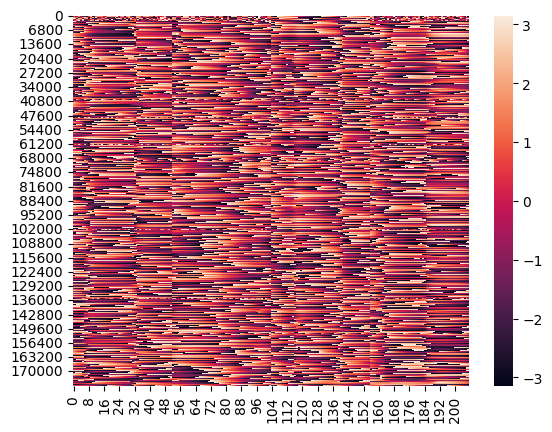

In [8]:
plt.figure()
sns.heatmap(csi_phase)
plt.show()

In [9]:
# unwrap
csi_phase_unwrapped = preprocess.phase_unwrap(csi_phase)

phase_unwrap
unwrapping, t=176783


<Figure size 640x480 with 0 Axes>

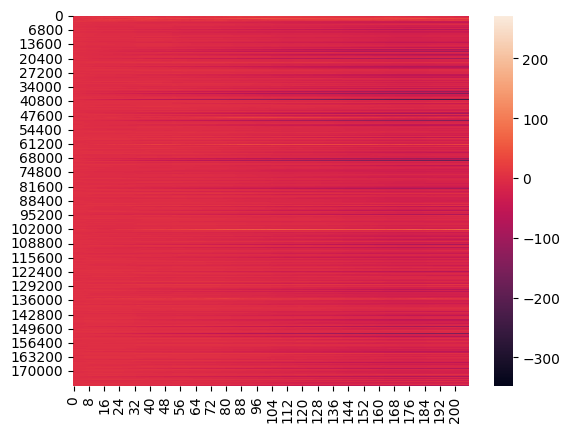

In [11]:
plt.figure()
sns.heatmap(csi_phase_unwrapped)
plt.show()

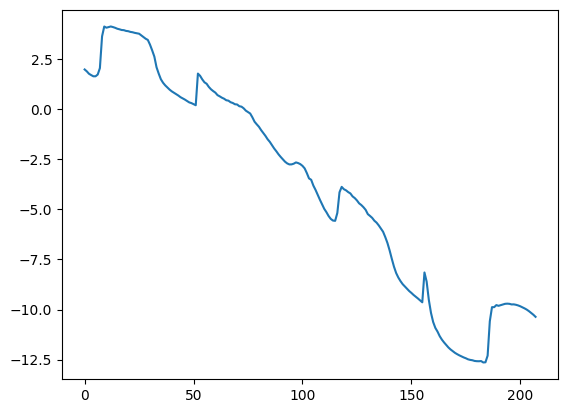

In [22]:
plt.figure()
plt.plot(csi_phase_unwrapped[80000, :])
plt.show()

In [13]:
# transform
csi_phase_transformed = preprocess.phase_transform(csi_phase_unwrapped)

phase_transform
transforming, t=176783


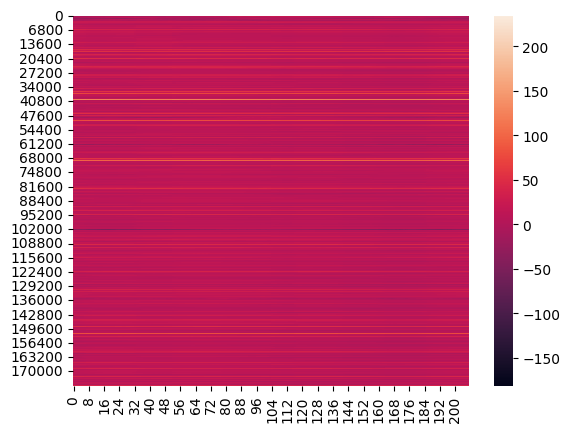

In [14]:
plt.figure()
sns.heatmap(csi_phase_transformed)
plt.show()

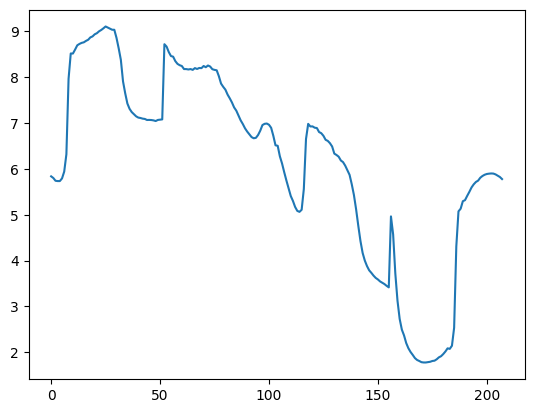

In [23]:
plt.figure()
plt.plot(csi_phase_transformed[80000, :])
plt.show()

In [16]:
csi_phase_interpolated = preprocess.interpolate(csi_phase_transformed, mid_time)

interpolate


transform関数で、前はF=256としていたが、今は208となっているので結果が異なっていることが判明した。  
どちらが適切かは微妙。  
前処理の論文をよく読む必要がある。  

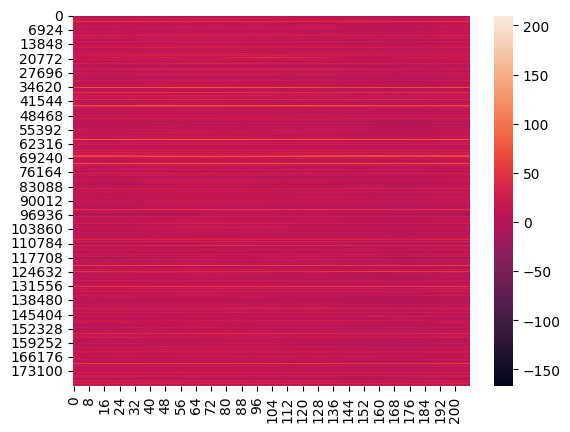

In [17]:
plt.figure()
sns.heatmap(csi_phase_interpolated)
plt.show()

In [18]:
csi_phase_lowpass = preprocess.lowpass(csi_phase_interpolated)

lowpass


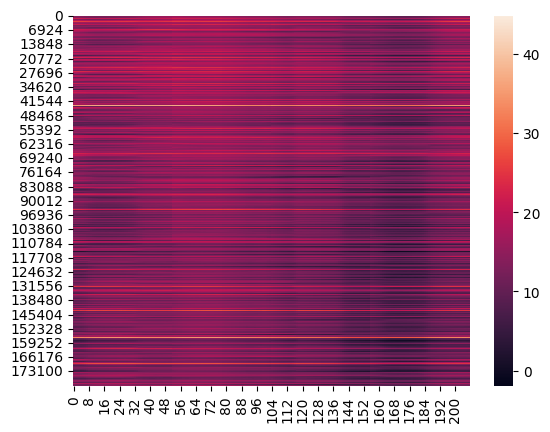

In [19]:
plt.figure()
sns.heatmap(csi_phase_lowpass)
plt.show()

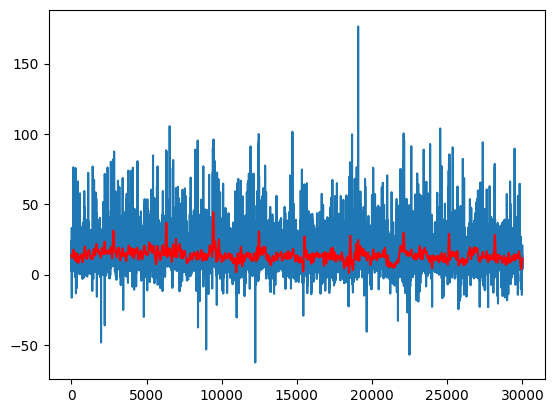

In [27]:
plt.figure()
plt.plot(csi_phase_interpolated[60000:90000, 134])
plt.plot(csi_phase_lowpass[60000:90000, 134], c='r')
plt.show()